# Introduction to statistics

## What are statistcs for? 

In [1]:
# Introduction to statistics
# Make as many anotations as necessary
rm(list=ls())

# load the libraries

library(ggplot2)
library(dplyr)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:

# generate 10 random temperature values in F
n = 20
x = runif(n, -10:100)
x

Warning message in runif(n, -10:100):
“NAs produced”


[1] -2.8279456 -6.1808419 -3.8024856 -5.1376282 -2.9356523 -3.6549339
 [7]  0.7132777  0.8153018 -1.0722117 -0.3303868  0.1748569  1.0000000
[13]        NaN        NaN        NaN        NaN        NaN        NaN
[19]        NaN        NaN

In [3]:
# what are those values in Celsius

y = (5/9)*x - 17.77
y = -17.77 + (5/9)*x
y

[1] -19.34108 -21.20380 -19.88249 -20.62424 -19.40092 -19.80052 -17.37373
 [8] -17.31705 -18.36567 -17.95355 -17.67286 -17.21444       NaN       NaN
[15]       NaN       NaN       NaN       NaN       NaN       NaN

In [4]:
data <- data.frame(F = x, C =y)
glimpse(data)

Rows: 20
Columns: 2
$ F <dbl> -2.8279456, -6.1808419, -3.8024856, -5.1376282, -2.9356523, -3.65493…
$ C <dbl> -19.34108, -21.20380, -19.88249, -20.62424, -19.40092, -19.80052, -1…


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


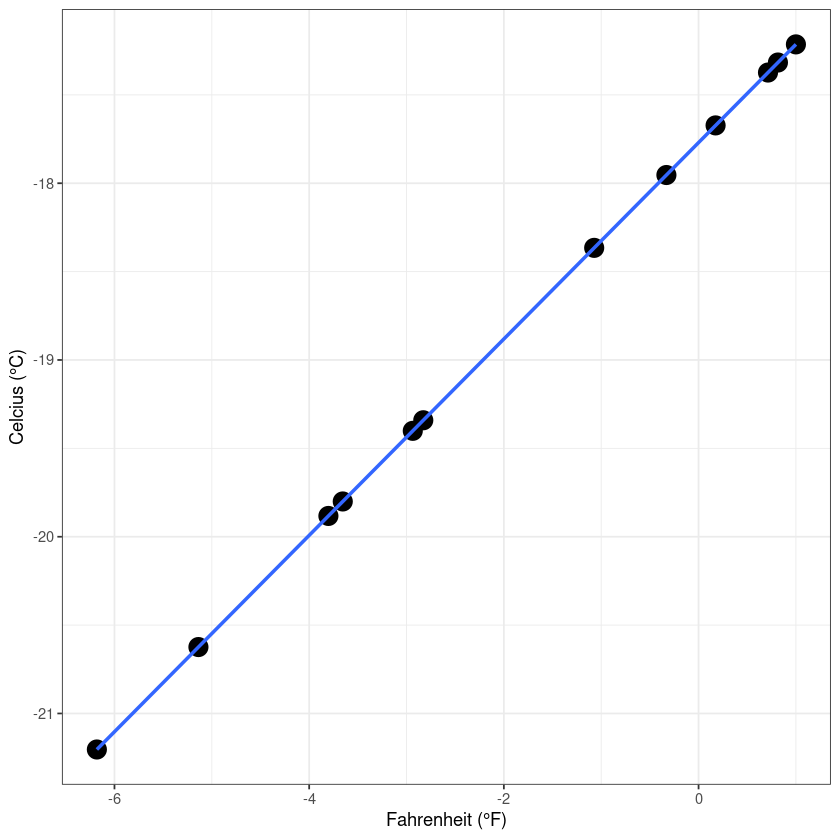

In [5]:
# let's plot the data
ggplot(data, aes(x = F, y = C)) +
geom_point(size = 5) + 
#geom_abline(intercept = -17.777, slope = 5/9, color = "red") +
theme_bw() + xlab("Fahrenheit (°F)") + ylab("Celcius (°C)") +
geom_smooth(method = "lm") 



Warning message:
“Removed 8 rows containing missing values (geom_point).”


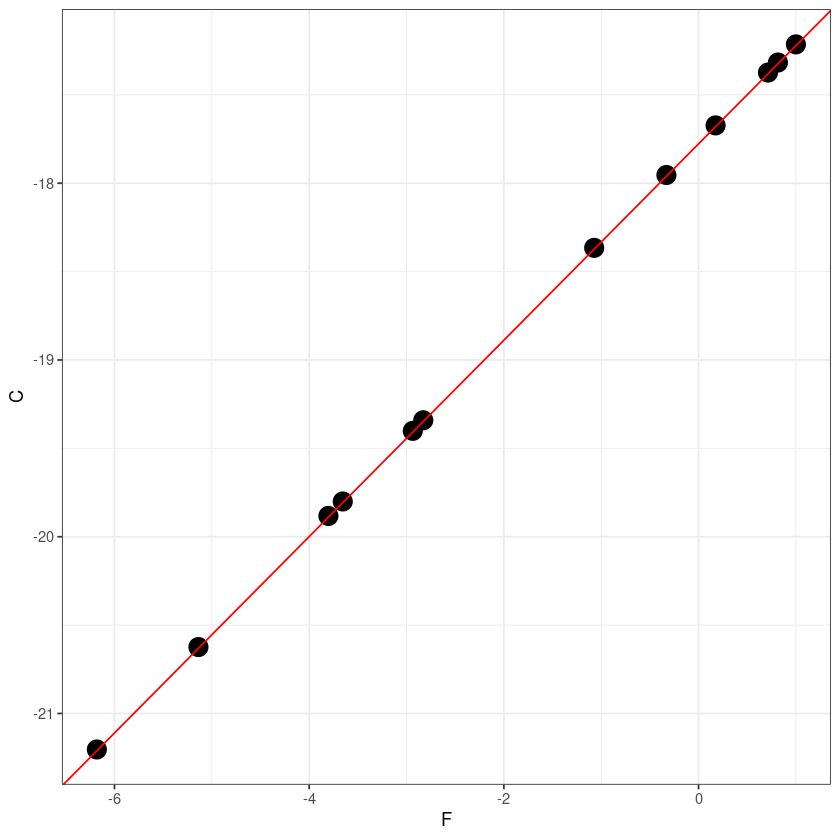

In [6]:
# let's plot the data
ggplot(data, aes(x = F, y = C)) +
geom_point(size = 5) + 
geom_abline(intercept = -17.777, slope = 5/9, color = "red") +
theme_bw()

# Noisy data

Why is real world data noisy?


In [7]:
# add noise

yy = rnorm(n, mean = - 17.77 + (5/9)*x , sd = 0.5)
yy

Warning message in rnorm(n, mean = -17.77 + (5/9) * x, sd = 0.5):
“NAs produced”


[1] -19.00551 -21.44787 -19.56453 -20.88221 -18.97283 -19.84657 -17.93117
 [8] -17.39763 -18.03867 -18.31570 -18.57159 -17.00053       NaN       NaN
[15]       NaN       NaN       NaN       NaN       NaN       NaN

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


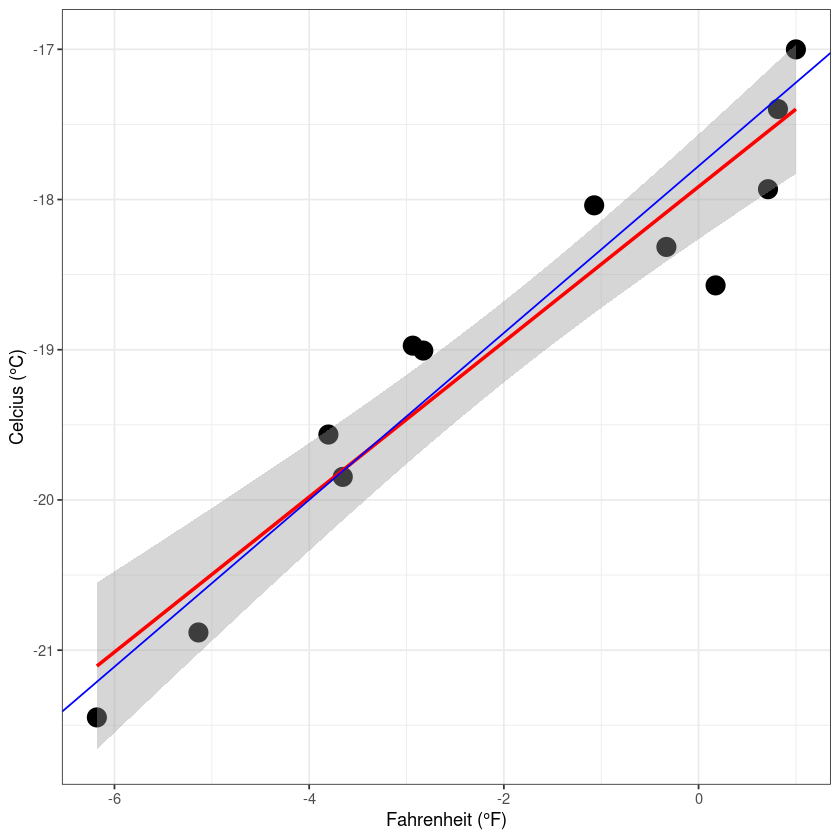

In [8]:
# let's plot the data

data$Cs <- yy
ggplot(data, aes(x = F, y = Cs)) +
geom_point(size = 5) + 
geom_smooth(method = 'lm',  colour = 'red') + 
geom_abline(intercept = -17.777, slope = 5/9, color = "blue") +
theme_bw() + xlab("Fahrenheit (°F)") + ylab("Celcius (°C)") 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


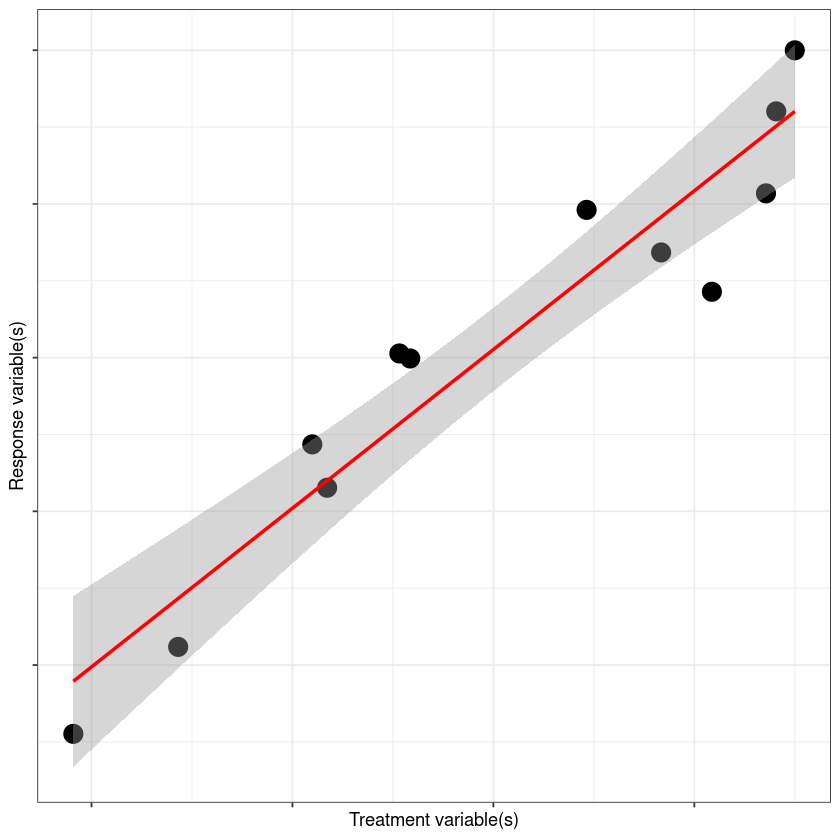

In [9]:
ggplot(data, aes(x = F, y = Cs)) +
geom_point(size = 5) + 
geom_smooth(method = 'lm',  colour = 'red') + 
#geom_abline(intercept = -17.777, slope = 5/9, color = "blue") +
theme_bw() + xlab("Treatment variable(s)") + ylab("Response variable(s)") +
theme(  axis.text.x=element_blank(),  axis.text.y=element_blank()  )


Call:
lm(formula = Cs ~ F, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74723 -0.32155  0.02565  0.37643  0.45761 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.91464    0.15695 -114.14  < 2e-16 ***
F             0.51634    0.05126   10.07 1.49e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4211 on 10 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.9103,	Adjusted R-squared:  0.9013 
F-statistic: 101.5 on 1 and 10 DF,  p-value: 1.488e-06


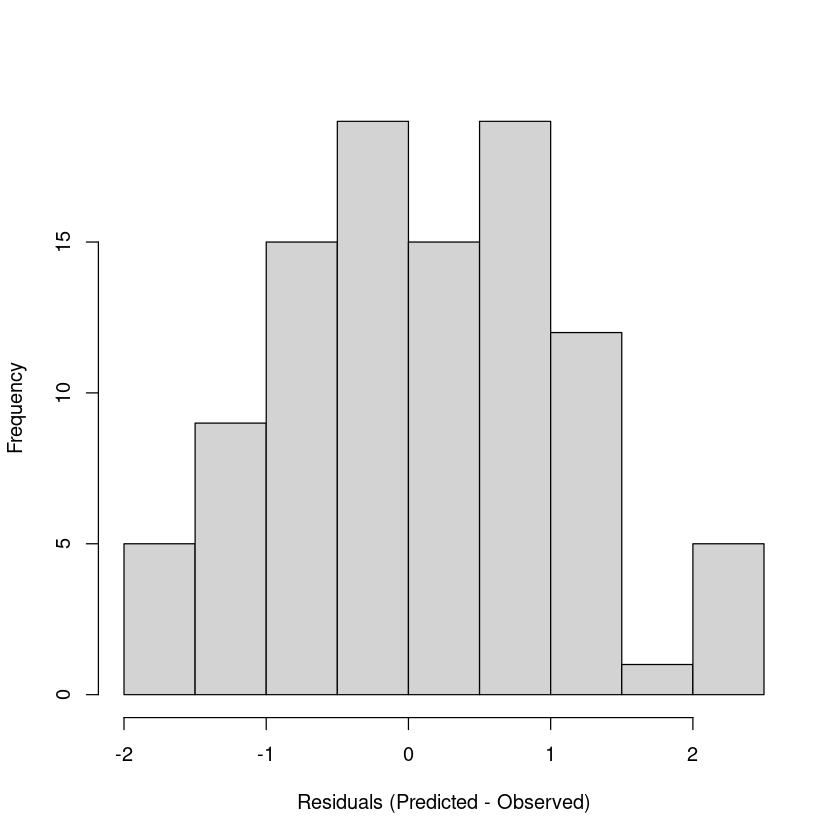

In [10]:
m1 <- lm(Cs ~ F, data)
summary(m1)

hist(rnorm(n = 100, mean = 0, sd = 1), breaks = 10, main = "", xlab = "Residuals (Predicted - Observed)")


## A lenguaje to understand statistical models

$$ \mu_{i} \approx \alpha + \beta X + \epsilon $$

$$ Y_{i} \approx Normal(0, \sigma) $$

$$ \sigma \approx Normal (0, sd) $$

$$ ^{o}C \approx intercept + slope F + \sigma $$

$$ \epsilon \approx Normal(0, sd) $$



### The intercept:
`-17.77 + (5/9)*x` -> `-17.77 + (5/9)*0`


In [11]:
alpha <- -17.77 + (5/9)*0
alpha

[1] -17.77

It is the interception of the `x` an `y` axis, when `x == 0`

## the slope (F)
rate of change of `y` as `x` increases in `1` unit. 

In [12]:
C1 = -17.77 + (5/9)*1
C2 = -17.77 + (5/9)*2

C2 - C1


[1] 0.5555556

## The error ($\sigma$)

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


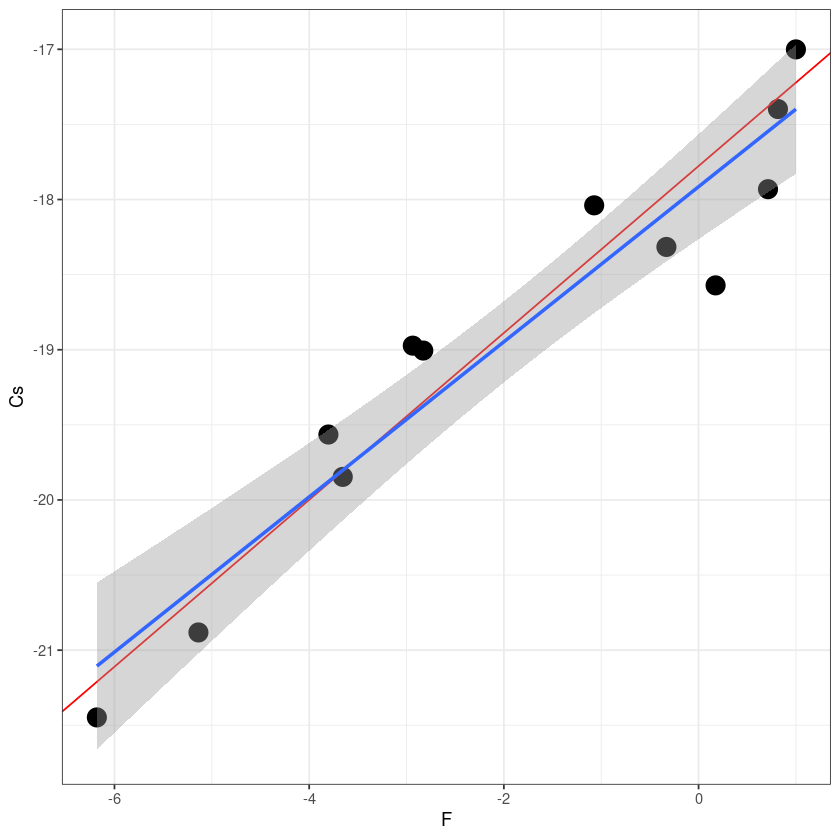

In [13]:

data$Cs <- yy
ggplot(data, aes(x = F, y = Cs)) +
geom_point(size = 5) + 
geom_abline(intercept = -17.777, slope = 5/9, color = "red") +
geom_smooth(method = 'lm') + 
theme_bw()

Warning message in rnorm(n, mean = -17.77 + (5/9) * x, sd = 0.2):
“NAs produced”


[1] -19.49689 -20.98991 -20.08378 -20.71341 -19.54316 -19.73397 -17.35831
 [8] -17.67183 -18.06394 -17.91608 -17.65385 -17.16571       NaN       NaN
[15]       NaN       NaN       NaN       NaN       NaN       NaN

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


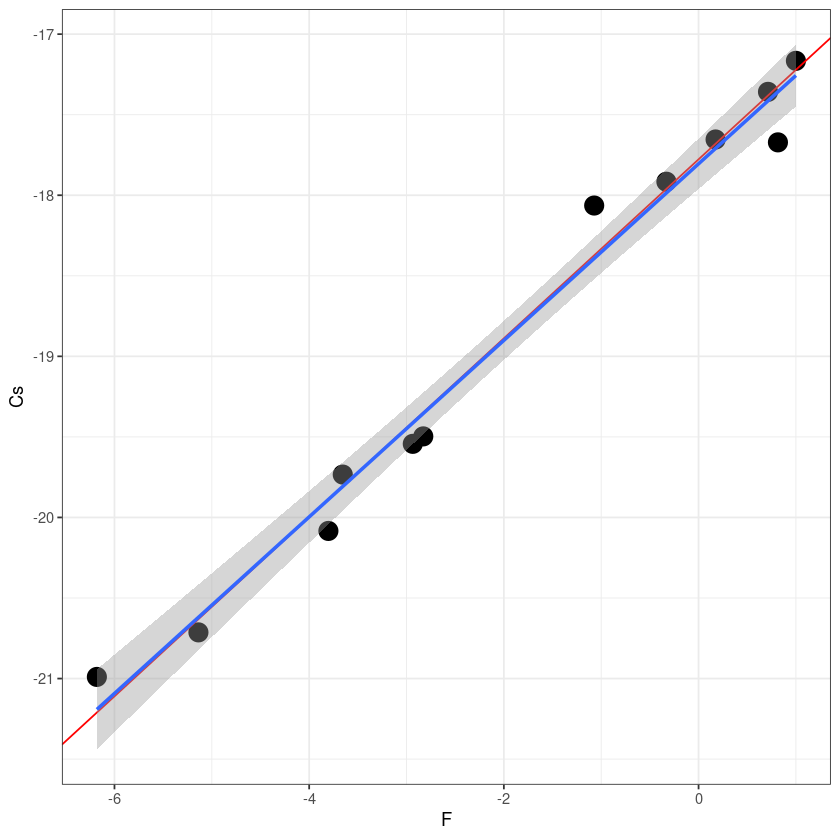

In [14]:
# more noise

yy = rnorm(n, mean = - 17.77 + (5/9)*x , sd = 0.2)
yy

data$Cs <- yy

ggplot(data, aes(x = F, y = Cs)) +
geom_point(size = 5) + 
geom_abline(intercept = -17.777, slope = 5/9, color = "red") +
geom_smooth(method = 'lm') + 
theme_bw()

In [15]:
m2 <- lm(Cs ~ F, data)
summary(m2)


Call:
lm(formula = Cs ~ F, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31389 -0.13296  0.05529  0.07793  0.32833 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.80471    0.07030 -253.29  < 2e-16 ***
F             0.54798    0.02296   23.87 3.79e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1886 on 10 degrees of freedom
  (8 observations deleted due to missingness)
Multiple R-squared:  0.9827,	Adjusted R-squared:  0.981 
F-statistic: 569.7 on 1 and 10 DF,  p-value: 3.787e-10


In [16]:
anova(m2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
F,1,20.2662143,20.26621430,569.6736,3.787287e-10
Residuals,10,0.3557513,0.03557513,NA,NA


In [17]:
-18.14346/ 0.38545

[1] -47.07085

Warning message in rnorm(n, mean = -17.77 + (5/9) * x, sd = 0.1):
“NAs produced”


[1] -19.22582 -21.37961 -19.89963 -20.76646 -19.38337 -19.81041 -17.33880
 [8] -17.33683 -18.42562 -17.97711 -17.50197 -17.22727       NaN       NaN
[15]       NaN       NaN       NaN       NaN       NaN       NaN

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 8 rows containing missing values (geom_point).”


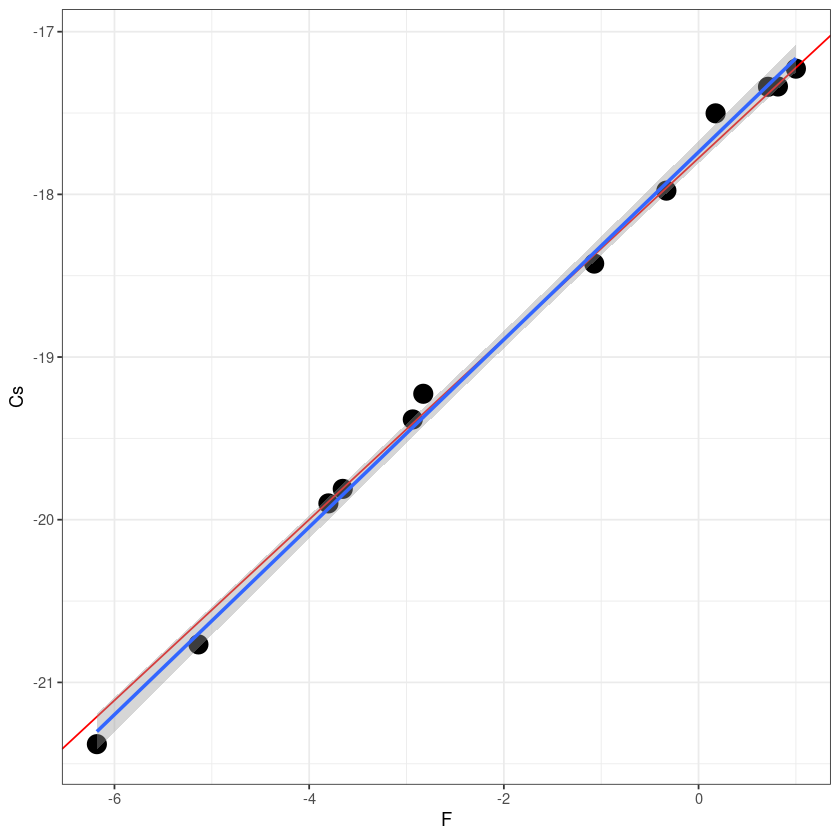

In [18]:
# add less noise

yy = rnorm(n, mean = - 17.77 + (5/9)*x , sd = 0.1)
yy

data$Cs <- yy

ggplot(data, aes(x = F, y = Cs)) +
geom_point(size = 5) + 
geom_abline(intercept = -17.777, slope = 5/9, color = "red") +
geom_smooth(method = 'lm') + 
theme_bw()

Rows: 40
Columns: 3
$ Root    <dbl> 6.225, 6.487, 4.919, 5.130, 5.417, 5.359, 7.614, 6.352, 4.975,…
$ Fruit   <dbl> 59.77, 60.98, 14.73, 19.28, 34.25, 35.53, 87.73, 63.21, 24.25,…
$ Grazing <chr> "Ungrazed", "Ungrazed", "Ungrazed", "Ungrazed", "Ungrazed", "U…


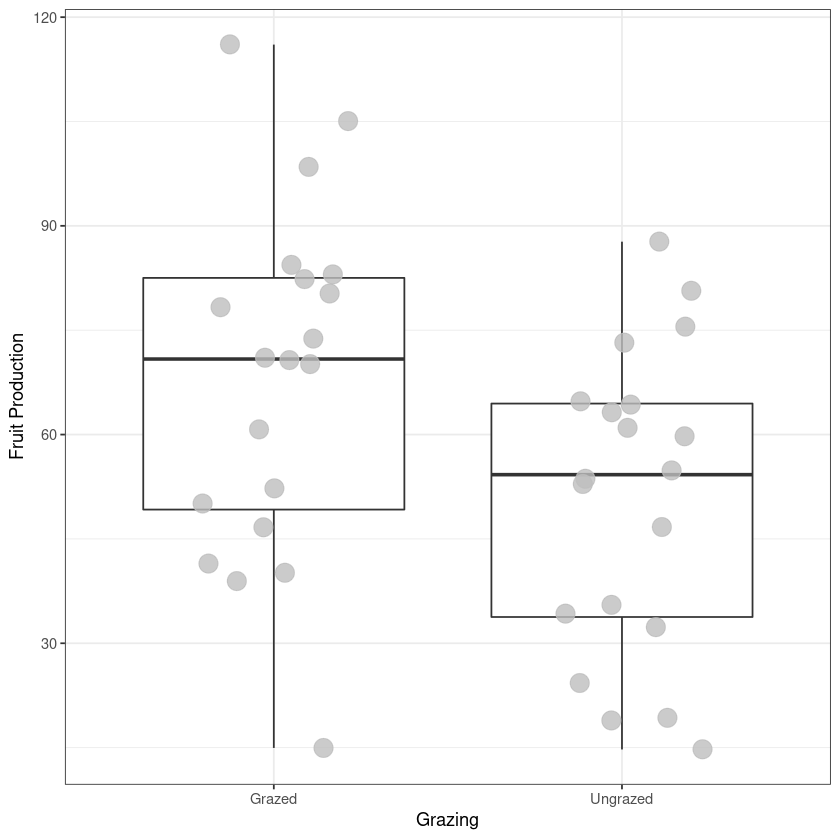

In [19]:
com <- read.csv('datasets-master/compensation.csv')
glimpse(com)
# compare the fruit production between grazed and ungrazed plants
# get more information about the box-plot
ggplot(com, aes(y=Fruit, x=Grazing))+
geom_boxplot() + 
geom_jitter(size = 5, colour= "gray", alpha =0.8, width = 0.25) +
theme_bw() + 
ylab("Fruit Production")

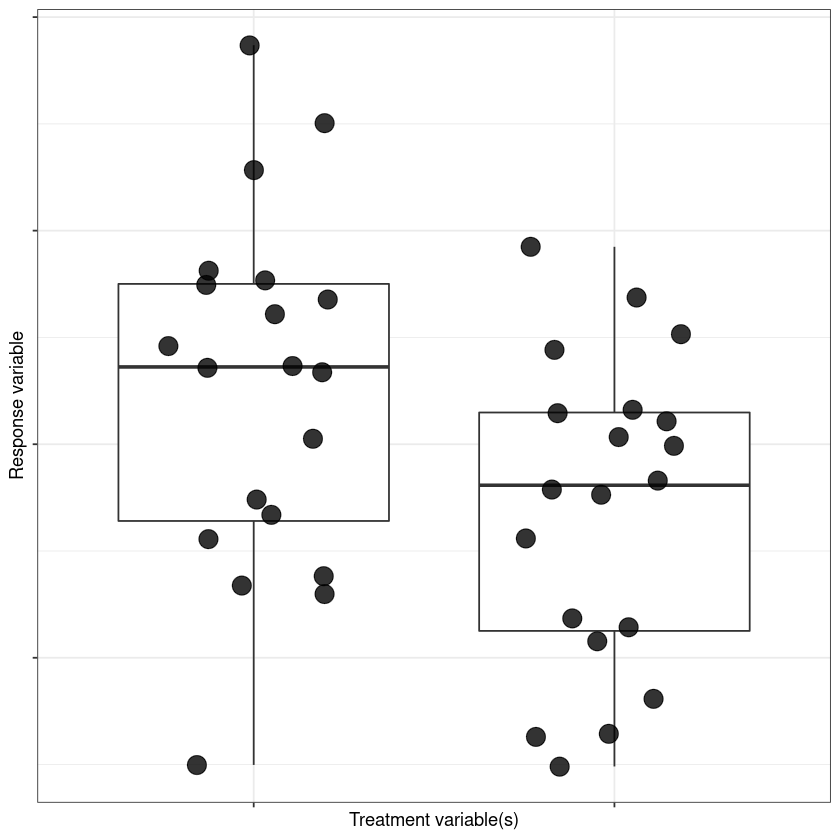

In [32]:
ggplot(com, aes(y=Fruit, x=Grazing))+
geom_boxplot() + 
geom_jitter(size = 5, colour= "black", alpha =0.8, width = 0.25) +
theme_bw() + ylab("Response variable") + xlab("Treatment variable(s)") +
theme(  axis.text.x=element_blank(),  axis.text.y=element_blank()  )


In [21]:
mc1 <- lm(Fruit ~ Grazing, com)

model.matrix(Fruit ~ Grazing, com)

summary(mc1)

,(Intercept),GrazingUngrazed
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1
10,1,1



Call:
lm(formula = Fruit ~ Grazing, data = com)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.991 -18.028   2.915  14.049  48.109 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)       67.941      5.236  12.976 1.54e-15 ***
GrazingUngrazed  -17.060      7.404  -2.304   0.0268 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.41 on 38 degrees of freedom
Multiple R-squared:  0.1226,	Adjusted R-squared:  0.09949 
F-statistic: 5.309 on 1 and 38 DF,  p-value: 0.02678


In [22]:
anova(mc1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Grazing,1,2910.436,2910.4360,5.308618,0.02678132
Residuals,38,20833.401,548.2474,NA,NA


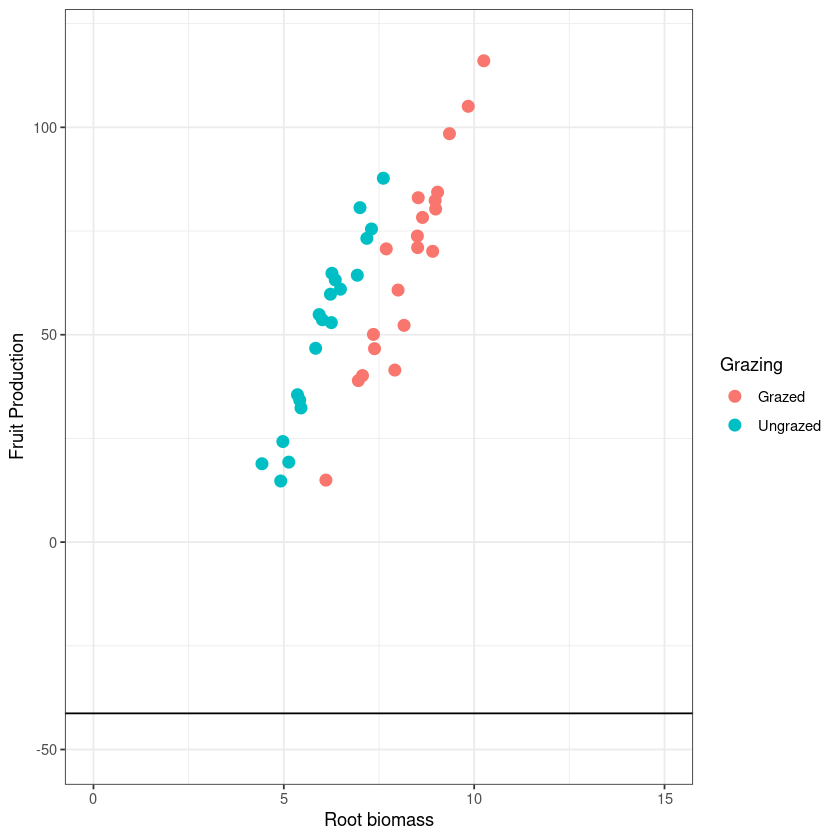

In [23]:
# Change the size of the points
# color the points by groups, e.g. Grazing
# remove the gray background
# change axis names
ggplot(com, aes(y=Fruit, x=Root, colour= Grazing))+
geom_point(size = 3) + 
xlab(label = "Root biomass") +
ylab("Fruit Production") +
ylim(-50, 120) +  xlim(0, 15) + 
geom_hline(yintercept = -41.286) +
theme_bw()

In [24]:
## regression Fruit and Root

mc2 <- lm(Fruit ~ Root, com)
summary(mc2)


Call:
lm(formula = Fruit ~ Root, data = com)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3844 -10.4447  -0.7574  10.7606  23.7556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -41.286     10.723  -3.850 0.000439 ***
Root          14.022      1.463   9.584  1.1e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.52 on 38 degrees of freedom
Multiple R-squared:  0.7073,	Adjusted R-squared:  0.6996 
F-statistic: 91.84 on 1 and 38 DF,  p-value: 1.099e-11


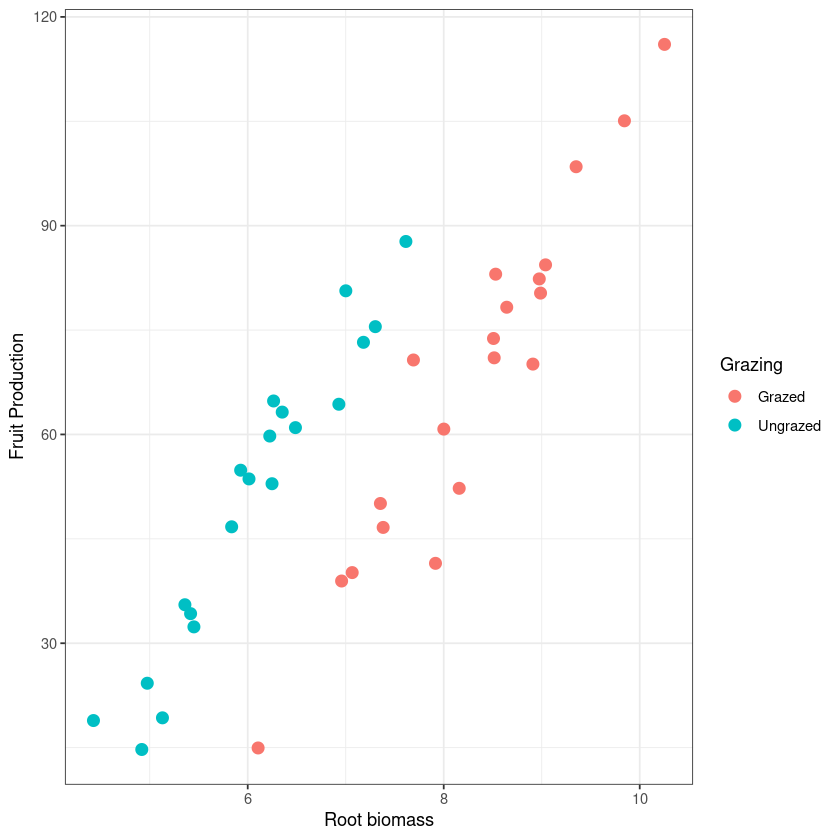

In [25]:
ggplot(com, aes(y=Fruit, x=Root, colour= Grazing))+
geom_point(size = 3) + 
xlab(label = "Root biomass") +
ylab("Fruit Production") +
#ylim(-50, 120) +  xlim(0, 15) + 
#geom_hline(yintercept = -41.286) +
theme_bw()

In [26]:
# Centering
com$Root_c <- com$Root - 7.5
com$Root_c

[1] -1.275 -1.013 -2.581 -2.370 -2.083 -2.141  0.114 -1.148 -2.525 -0.570
[11] -1.252 -2.049 -1.487 -1.572 -1.236 -0.319 -0.499 -3.074 -0.198 -1.664
[21]  2.753 -0.542  0.501  1.539  1.410 -1.394  0.191  1.488  1.475  2.344
[31]  1.008 -0.146  1.143  0.416  1.851 -0.434  0.658 -0.118  1.015  1.030

In [27]:
mc3 <- lm(Fruit ~ Root_c, com)
summary(mc3)


Call:
lm(formula = Fruit ~ Root_c, data = com)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3844 -10.4447  -0.7574  10.7606  23.7556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   63.882      2.188  29.190  < 2e-16 ***
Root_c        14.022      1.463   9.584  1.1e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.52 on 38 degrees of freedom
Multiple R-squared:  0.7073,	Adjusted R-squared:  0.6996 
F-statistic: 91.84 on 1 and 38 DF,  p-value: 1.099e-11


In [28]:
# scaling 
com$Root_sc <- (com$Root - mean(com$Root)) / sd(com$Root)
com$Root_sc

mc4 <- lm(Fruit ~ Root_sc, com)
summary(mc4)

[1] -0.6460843535 -0.4690471725 -1.5285674008 -1.3859916558 -1.1920616140
 [6] -1.2312530510  0.2924829916 -0.5602686207 -1.4907273927 -0.1697056794
[11] -0.6305429216 -1.1690873233 -0.7893358129 -0.8467715396 -0.6197314907
[16] -0.0001013572 -0.1217299548 -1.8616946154  0.0816600890 -0.9089372673
[21]  2.0756933758 -0.1507856753  0.5539844765  1.2553760562  1.1682088946
[26] -0.7264943708  0.3445130028  1.2209146202  1.2121303326  1.7993261734
[31]  0.8965716932  0.1167972395  0.9877931414  0.4965487499  1.4661989588
[36] -0.0778085168  0.6600716422  0.1357172435  0.9013016942  0.9114374107


Call:
lm(formula = Fruit ~ Root_sc, data = com)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.3844 -10.4447  -0.7574  10.7606  23.7556 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   59.411      2.138  27.786  < 2e-16 ***
Root_sc       20.752      2.165   9.584  1.1e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.52 on 38 degrees of freedom
Multiple R-squared:  0.7073,	Adjusted R-squared:  0.6996 
F-statistic: 91.84 on 1 and 38 DF,  p-value: 1.099e-11


In [29]:
 sd(com$Root)

[1] 1.479915